In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set the seed for reproducibility
tf.random.set_seed(42)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset
base_path = '/content/drive/My Drive/Colab Notebooks/Vegetable Images/'
train_path = 'train/'
val_path = 'validation/'
test_path = 'test/'

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data
img_size = (224, 224)

train_data = train_datagen.flow_from_directory(base_path + train_path,
                                               target_size=img_size,
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

val_data = val_datagen.flow_from_directory(base_path + val_path,
                                           target_size=img_size,
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

test_data = test_datagen.flow_from_directory(base_path + test_path,
                                             target_size=img_size,
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)





Mounted at /content/drive
Found 15010 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3010 images belonging to 15 classes.


In [2]:
# Build the model
model_1 = Sequential([
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2), padding="valid"),
    Conv2D(50, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(15, activation="softmax")  # Number of classes is 15
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        validation_data=val_data,
                        epochs=10)

# Save the model
model_1.save("/content/drive/My Drive/Colab Notebooks/Vegetable Images/model_10_epochs.keras")

Epoch 1/10
470/470 [==============================] - 4581s 10s/step - loss: 1.2135 - accuracy: 0.6086 - val_loss: 0.5782 - val_accuracy: 0.8270
Epoch 2/10
470/470 [==============================] - 359s 764ms/step - loss: 0.6663 - accuracy: 0.7900 - val_loss: 0.3771 - val_accuracy: 0.8783
Epoch 3/10
470/470 [==============================] - 358s 760ms/step - loss: 0.5072 - accuracy: 0.8420 - val_loss: 0.3362 - val_accuracy: 0.8933
Epoch 4/10
470/470 [==============================] - 354s 752ms/step - loss: 0.4553 - accuracy: 0.8590 - val_loss: 0.2937 - val_accuracy: 0.9070
Epoch 5/10
470/470 [==============================] - 353s 750ms/step - loss: 0.3717 - accuracy: 0.8857 - val_loss: 0.2135 - val_accuracy: 0.9350
Epoch 6/10
470/470 [==============================] - 358s 760ms/step - loss: 0.3410 - accuracy: 0.8923 - val_loss: 0.1892 - val_accuracy: 0.9403
Epoch 7/10
470/470 [==============================] - 357s 760ms/step - loss: 0.3050 - accuracy: 0.9039 - val_loss: 0.2139 - 

# New Section

95/95 [==============================] - 799s 8s/step - loss: 0.1749 - accuracy: 0.9449
Test Loss: 0.17492340505123138, Test Accuracy: 0.944850504398346
95/95 [==============================] - 14s 150ms/step


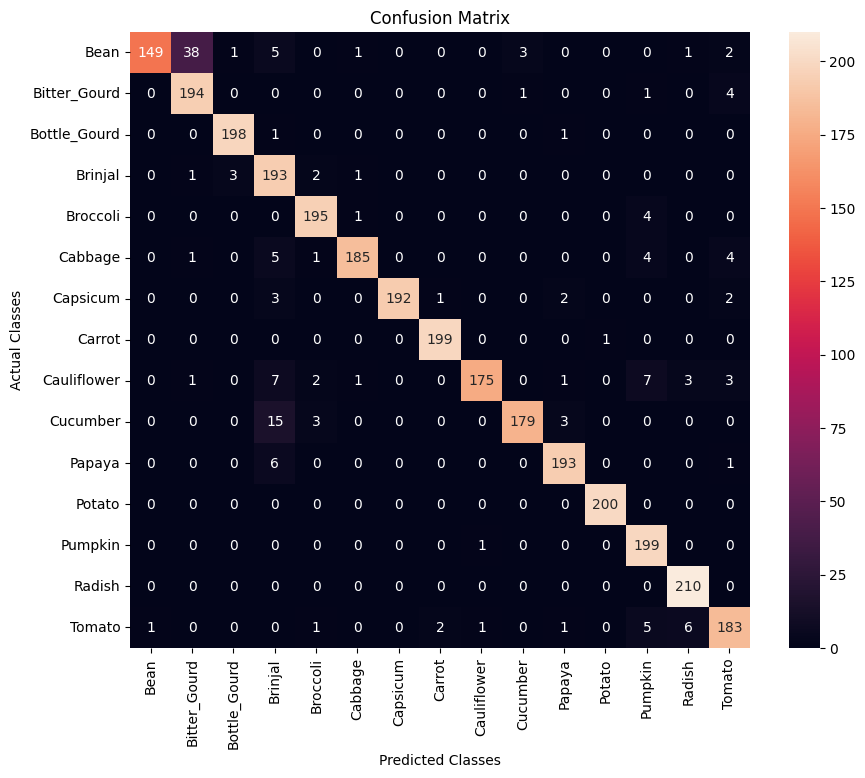

              precision    recall  f1-score   support

        Bean       0.99      0.74      0.85       200
Bitter_Gourd       0.83      0.97      0.89       200
Bottle_Gourd       0.98      0.99      0.99       200
     Brinjal       0.82      0.96      0.89       200
    Broccoli       0.96      0.97      0.97       200
     Cabbage       0.98      0.93      0.95       200
    Capsicum       1.00      0.96      0.98       200
      Carrot       0.99      0.99      0.99       200
 Cauliflower       0.99      0.88      0.93       200
    Cucumber       0.98      0.90      0.93       200
      Papaya       0.96      0.96      0.96       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.90      0.99      0.95       200
      Radish       0.95      1.00      0.98       210
      Tomato       0.92      0.92      0.92       200

    accuracy                           0.94      3010
   macro avg       0.95      0.94      0.94      3010
weighted avg       0.95   

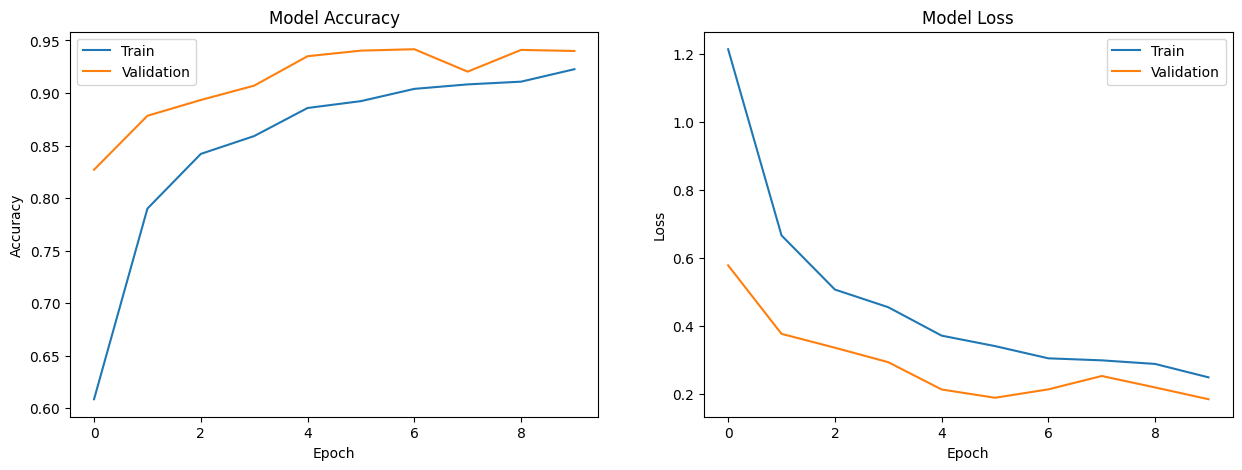

In [3]:
# Evaluate the model
eval_result = model_1.evaluate(test_data)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

# Predict on the test data
predictions = model_1.predict(test_data)

# Convert predictions to class labels
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
conf_matrix = confusion_matrix(y_true_class, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

# Classification report
print(classification_report(y_true_class, y_pred_class, target_names=class_labels))

# Plot training and validation accuracy and loss
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Train')
plt.plot(history_1.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
